In [2]:
import pandas as pd

from constants import *

In [14]:
data = pd.read_csv(base_path / 'ltla_2020-12-16.csv', index_col='date', parse_dates=['date'])
data

,areaType,areaCode,areaName,uniquePeopleTestedBySpecimenDateRollingSum,uniqueCasePositivityBySpecimenDateRollingSum
date,,,,,
2020-12-16,ltla,E06000001,Hartlepool,NaN,NaN
2020-12-15,ltla,E06000001,Hartlepool,NaN,NaN
2020-12-14,ltla,E06000001,Hartlepool,NaN,NaN
2020-12-13,ltla,E06000001,Hartlepool,NaN,NaN
2020-12-12,ltla,E06000001,Hartlepool,NaN,NaN
...,...,...,...,...,...
2020-01-07,ltla,NaN,Resident outside Wales,NaN,NaN
2020-01-06,ltla,NaN,Resident outside Wales,NaN,NaN
2020-01-05,ltla,NaN,Resident outside Wales,NaN,NaN


Text(0, 0.5, '% people testing positive')

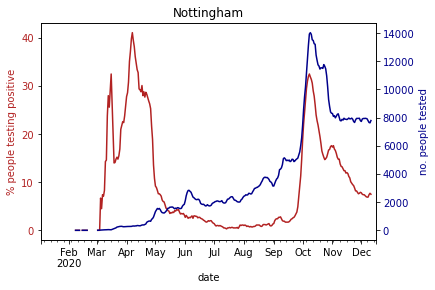

In [30]:
area_data = data[data[area_code] == 'E06000018']
pos_col = 'firebrick'
tests_col = 'darkblue'
pos_ax = area_data['uniqueCasePositivityBySpecimenDateRollingSum'].plot(color=pos_col, title='Nottingham')
tests_ax = pos_ax.twinx()
tests_ax.tick_params(axis='y', labelcolor=tests_col)
tests_ax.set_ylabel('no. people tested', color=tests_col)
area_data['uniquePeopleTestedBySpecimenDateRollingSum'].plot(ax=tests_ax, color=tests_col)

pos_ax.tick_params(axis='y', labelcolor=pos_col)
pos_ax.set_ylabel('% people testing positive', color=pos_col)


In [45]:
data = pd.read_csv(base_path/'nation_2020-12-16 (1).csv', index_col=['date'], parse_dates=['date'])
filtered_data = data[data['uniqueCasePositivityBySpecimenDateRollingSum'].notnull() & (data['areaName']=='England')]
filtered_data

,areaType,areaCode,areaName,newCasesBySpecimenDate,uniqueCasePositivityBySpecimenDateRollingSum,uniquePeopleTestedBySpecimenDateRollingSum,newDeaths28DaysByDeathDate
date,,,,,,,
2020-12-11,nation,E92000001,England,19614.0,7.5,1630871.0,304.0
2020-12-10,nation,E92000001,England,18413.0,7.2,1590940.0,309.0
2020-12-09,nation,E92000001,England,17403.0,7.0,1556525.0,332.0
2020-12-08,nation,E92000001,England,16630.0,6.8,1550374.0,340.0
2020-12-07,nation,E92000001,England,17372.0,6.6,1551570.0,333.0
...,...,...,...,...,...,...,...
2020-02-12,nation,E92000001,England,0.0,0.5,1989.0,NaN
2020-02-11,nation,E92000001,England,1.0,0.7,1488.0,NaN
2020-02-10,nation,E92000001,England,0.0,0.6,1087.0,NaN


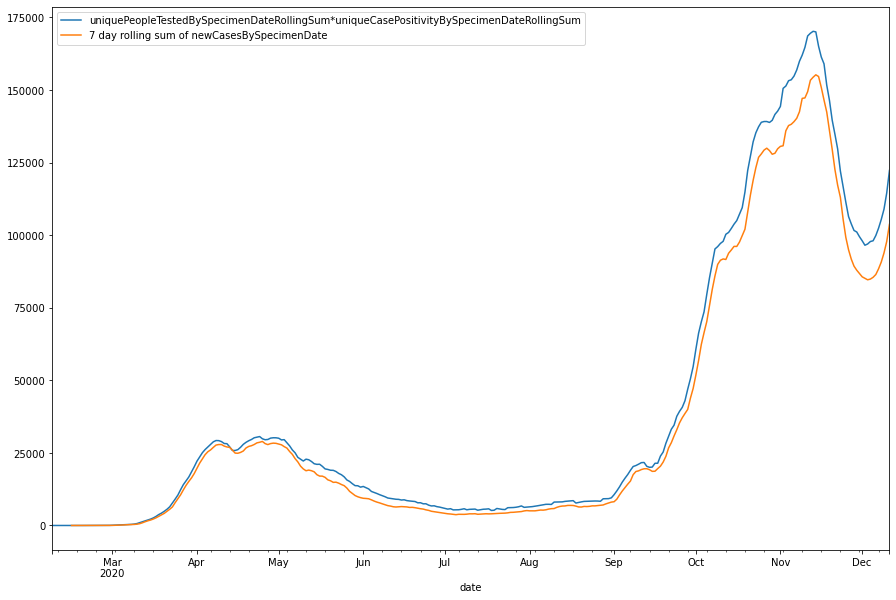

In [56]:
pd.DataFrame({
    'uniquePeopleTestedBySpecimenDateRollingSum*uniqueCasePositivityBySpecimenDateRollingSum': filtered_data['uniquePeopleTestedBySpecimenDateRollingSum']*filtered_data['uniqueCasePositivityBySpecimenDateRollingSum']/100,
    '7 day rolling sum of newCasesBySpecimenDate': filtered_data['newCasesBySpecimenDate'].rolling(7).sum().shift(-7),
}).plot(figsize=(15,10))

In [62]:
new_stats = filtered_data['uniquePeopleTestedBySpecimenDateRollingSum']*filtered_data['uniqueCasePositivityBySpecimenDateRollingSum']/100
old_stats = filtered_data['newCasesBySpecimenDate'].rolling(7).sum().shift(-7)

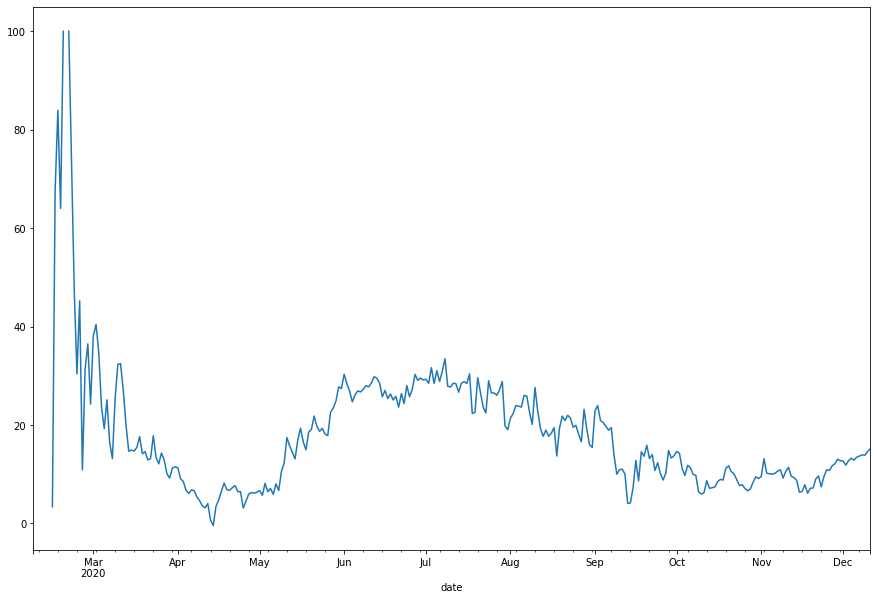

In [64]:
( 100*(new_stats-old_stats) / new_stats ).plot(figsize=(15, 10))

In [67]:
positivity = filtered_data['uniqueCasePositivityBySpecimenDateRollingSum']/100
population = 66_000_000
tested = filtered_data['uniquePeopleTestedBySpecimenDateRollingSum']/population

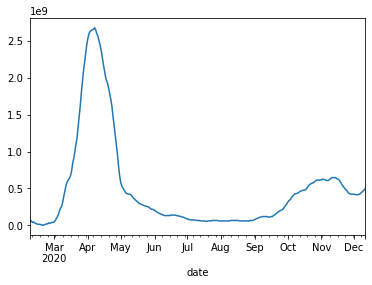

In [70]:
(filtered_data['uniqueCasePositivityBySpecimenDateRollingSum']*population).plot()

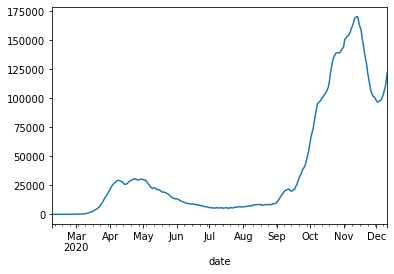

In [71]:
(filtered_data['uniquePeopleTestedBySpecimenDateRollingSum']*positivity).plot()